In [ ]:
import os
import numpy as np
import torch
from PIL import Image
import sys
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
!pip install Pillow opencv-python sklearn numpy

In [ ]:
!git clone https://github.com/nicolaihaeni/MinneApple.git

Cloning into 'MinneApple'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 89 (delta 30), reused 55 (delta 10), pack-reused 0
Unpacking objects: 100% (89/89), done.


In [ ]:
cd /content/drive/MyDrive/MinneApple

/content/drive/MyDrive/MinneApple


In [ ]:
!mkdir dataset1

In [ ]:
cd /content/drive/MyDrive/MinneApple/dataset1/train

/content/drive/MyDrive/MinneApple/dataset1/train


In [ ]:
!mkdir masks

In [ ]:
!mkdir models_39_100

In [ ]:
cd /content/drive/MyDrive/MinneApple

/content/drive/MyDrive/MinneApple


In [ ]:
#firstly 30 epoches
#will try 70 epoches

In [ ]:
!python train_rcnn.py --data_path /content/drive/MyDrive/MinneApple/dataset1 --model frcnn --epochs 62 --output-dir /content/drive/MyDrive/MinneApple/models_39_100 --b 2 --lr 0.0001 --resume /content/drive/MyDrive/MinneApple/models_30_100/model_7.pth

frcnn
Namespace(batch_size=2, data_path='/content/drive/MyDrive/MinneApple/dataset1', dataset='AppleDataset', device='cuda', epochs=62, lr=0.0001, lr_gamma=0.1, lr_step_size=8, lr_steps=[8, 11], model='frcnn', momentum=0.9, output_dir='/content/drive/MyDrive/MinneApple/models_39_100', print_freq=20, resume='/content/drive/MyDrive/MinneApple/models_30_100/model_7.pth', weight_decay=0.0001, workers=0)
Loading data
Creating data loaders
Creating model
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100% 160M/160M [00:02<00:00, 81.2MB/s]
Start training
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the

In [ ]:
cd /content/drive/MyDrive/MinneApple

/content/drive/MyDrive/MinneApple


In [ ]:
# Predict for Faster RCNN
!python predict_rcnn.py --data_path /content/drive/MyDrive/MinneApple/dataset1/prediction/ref --output_file /content/drive/MyDrive/MinneApple/dataset1/prediction/res/model_61_result.txt --weight_file /content/drive/MyDrive/MinneApple/models_39_100/model_61.pth --device cpu --frcnn


Loading model
Creating data loaders
Predicting on image: 000001.png
Predicting on image: 000002.png
Predicting on image: 000003.png
Predicting on image: 000004.png
Predicting on image: 000005.png
Predicting on image: 000006.png
Predicting on image: 000007.png
Predicting on image: 000008.png
Predicting on image: 000010.png
Predicting on image: 000014.png
Predicting on image: 000017.png
Predicting on image: 000019.png
Predicting on image: 000020.png
Predicting on image: 000022.png
Predicting on image: 000024.png
Predicting on image: 000027.png
Predicting on image: 000028.png
Predicting on image: 000029.png
Predicting on image: 000030.png
Predicting on image: 000031.png
Predicting on image: 000033.png
Predicting on image: 000034.png
Predicting on image: 000035.png
Predicting on image: 000036.png
Predicting on image: 000038.png
Predicting on image: 000039.png
Predicting on image: 000040.png
Predicting on image: 000042.png
Predicting on image: 000043.png
Predicting on image: 000045.png
Pred

In [ ]:
cd /content/drive/MyDrive/MinneApple/dataset/prediction

/content/drive/MyDrive/MinneApple/dataset/prediction


In [ ]:
!mkdir res

In [ ]:
!mkdir ref

In [ ]:
cd /content/drive/MyDrive/MinneApple

/content/drive/MyDrive/MinneApple


In [ ]:
!python detection_eval.py /content/drive/MyDrive/MinneApple/dataset/prediction /content/drive/MyDrive/MinneApple/evaluation

In [ ]:
 txts_path = get_file_paths(txts_dir)  ## drawing bounding box in images

# for txt in txts_path:

#     img_name = txt.split('/')[-1].split('.')[0] + '.png'
#     img_path = os.path.join(imgs_dir, img_name)
#     print(img_path)

#     img_label = get_save_file(save_img_label_dir, img_name)

#     img = cv2.imread(img_path)
#     boxs = np.loadtxt(txt)

#     for i, box in enumerate(boxs):

#       cv2.rectangle(img,(int(box[0]),int(box[1])),(int(box[2]),int(box[3])),(0,0,255),1)
#       cv2.putText(img, str(i+1), (int(box[0]),int(box[1])),cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255), 1)

#     cv2.imwrite(img_label, img)


# label = cv2.imread('./train/masks/20150919_174151_image171.png')
# img = cv2.imread('./train/images/20150919_174151_image171.png')

# a = box_and_num(label)

# print(a)

# for i, box in enumerate(boxs):

#   cv2.rectangle(img,(box[0],box[1]),(box[2],box[3]),(0,255,0),1)
#   cv2.putText(img, str(i+1), (box[0],box[1]),cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255), 1)

# cv2_imshow(label)

In [ ]:
def vis_detections(im, class_name, dets, thresh):
    """Visual debugging of detections."""
    num = 0
    bboxes = []
    for i in range(dets.shape[0]):
        bbox = tuple(int(np.round(x)) for x in dets[i, :4])
        score = dets[i, -1]
        if score > thresh:
            num = num + 1
            bboxes.append(bbox)
            cv2.rectangle(im, bbox[0:2], bbox[2:4], (0, 204, 0), 2)
            cv2.putText(im, '%s: %.3f' % (class_name, score), (bbox[0], bbox[1] + 15), cv2.FONT_HERSHEY_PLAIN,
                        1.0, (0, 0, 255), thickness=1)
            
    return im, num, bboxes

In [ ]:
def py_cpu_nms(dets, thresh):
    """Pure Python NMS baseline."""
    x1 = dets[:, 0]
    y1 = dets[:, 1]
    x2 = dets[:, 2]
    y2 = dets[:, 3]
    scores = dets[:, 4]

    areas = (x2 - x1 + 1) * (y2 - y1 + 1)
    order = scores.argsort()[::-1]  #[::-1]表示降序排序，输出为其对应序号

    keep = []                     #需要保留的bounding box
    while order.size > 0:
        i = order[0]              #取置信度最大的（即第一个）框
        keep.append(i)            #将其作为保留的框
        
        #以下计算置信度最大的框（order[0]）与其它所有的框（order[1:]，即第二到最后一个）框的IOU，以下都是以向量形式表示和计算
        xx1 = np.maximum(x1[i], x1[order[1:]]) #计算xmin的max,即overlap的xmin
        yy1 = np.maximum(y1[i], y1[order[1:]]) #计算ymin的max,即overlap的ymin
        xx2 = np.minimum(x2[i], x2[order[1:]]) #计算xmax的min,即overlap的xmax
        yy2 = np.minimum(y2[i], y2[order[1:]]) #计算ymax的min,即overlap的ymax

        w = np.maximum(0.0, xx2 - xx1 + 1)      #计算overlap的width
        h = np.maximum(0.0, yy2 - yy1 + 1)      #计算overlap的hight
        inter = w * h                           #计算overlap的面积
        ovr = inter / (areas[i] + areas[order[1:]] - inter) #计算并，-inter是因为交集部分加了两次。

        inds = np.where(ovr <= thresh)[0]          #本轮，order仅保留IOU不大于阈值的下标
        order = order[inds + 1]                    #删除IOU大于阈值的框

    return keep  

In [ ]:
def box_and_num(label):

  n_apple = label.max()

  boxs = []
  for i in range(1, n_apple+1):

    pos = np.where(label[:,:,1] == i)
    pos = np.array([pos[0].tolist(), pos[1].tolist()])

    if np.size(pos[0]) != 0:   # miss some labels, so no pixels

      x_min = pos[1].min()
      x_max = pos[1].max()
      x_c = (x_max - x_min)/2

      y_min = pos[0].min()
      y_max = pos[0].max()
      y_c = (y_max - y_min)/2
      

      boxs.append([x_min,y_min,x_max,y_max])
  
  if len(boxs) == n_apple:

    return boxs, n_apple

  else:

    return [], n_apple

In [ ]:
img_dir = '/content/drive/MyDrive/MinneApple/dataset1/prediction/ref/images'
mask_dir = '/content/drive/MyDrive/MinneApple/dataset1/prediction/ref/masks'
result_path = '/content/drive/MyDrive/MinneApple/dataset1/prediction/res/model_61_result.txt'

img_files = os.listdir(img_dir)

imgs_name = []
imgs_score = []
imgs_box = []

# for file in img_files:
  
with open(result_path) as f:

  contents = f.readlines()
  # pos = np.where(contents[:][0:10] == file)
  num = len(contents)

  for i in range(num):

      img_name = contents[i].split(',')[0]
      img_score = float(contents[i].split(',')[5].split('\n')[0])
      xmin = contents[i].split(',')[1]
      ymin = contents[i].split(',')[2]
      xmax = contents[i].split(',')[3]
      ymax = contents[i].split(',')[4]
      img_box = [float(xmin), float(ymin), float(xmax), float(ymax)]

      # img_path = os.path.join(img_dir, img_name)
      imgs_name.append(img_name)
      imgs_score.append(img_score)
      imgs_box.append(img_box)

imgs_name = np.array(imgs_name)
# imgs_name = imgs_name.reshape(imgs_name.shape[0], 1)
imgs_score = np.array(imgs_score)
imgs_score = imgs_score.reshape(imgs_score.shape[0], 1)
imgs_box = np.array(imgs_box)
imgs_box = imgs_box.reshape(imgs_box.shape[0], 4)

box_score = np.concatenate((imgs_box, imgs_score), axis=1)


name_list = np.unique(imgs_name)
each_result = []
gt_est = []

for name in name_list:

    img_id = np.where(imgs_name == name)[0]
    box_each = box_score[img_id,:]
    nhs_id = py_cpu_nms(box_each, 0.4)
    box_filtered = box_each[nhs_id]
    each_result.append(box_filtered) 
    img_path = os.path.join(img_dir, name)
    mask_path = os.path.join(mask_dir, name)
    im = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    gt = mask.max()
    class_name = 'apple'
    dets = box_filtered
    thresh = 0.9
    im, num, bbox = vis_detections(im, class_name, dets, thresh)
    gt_est.append([gt, num])
    print([gt, num])
    # cv2_imshow(im)


  


[45, 30]
[70, 53]
[37, 38]
[13, 13]
[30, 25]
[67, 50]
[74, 64]
[6, 6]
[15, 14]
[31, 29]
[11, 14]
[5, 5]
[68, 58]
[6, 7]
[30, 30]
[17, 18]
[10, 12]
[27, 33]
[7, 7]
[33, 39]
[86, 54]
[28, 32]
[39, 36]
[71, 56]
[25, 25]
[66, 58]
[12, 12]
[38, 40]
[16, 19]
[4, 4]
[7, 7]
[24, 24]
[8, 10]
[36, 31]
[65, 62]
[30, 30]
[8, 8]
[113, 84]
[21, 20]
[77, 68]
[14, 11]
[7, 7]
[88, 70]
[35, 30]
[44, 43]
[51, 49]
[40, 34]
[17, 18]
[70, 69]
[62, 49]
[4, 5]
[5, 5]
[10, 11]
[45, 47]
[17, 17]
[11, 11]
[50, 41]
[2, 2]
[56, 44]
[6, 6]
[5, 5]
[12, 13]
[16, 16]
[34, 32]
[47, 48]
[54, 49]
[11, 11]
[48, 43]
[8, 8]
[72, 60]
[51, 53]
[4, 5]
[12, 12]
[82, 77]
[6, 6]
[5, 5]
[8, 10]
[76, 70]
[7, 9]
[8, 8]
[1, 1]
[3, 4]
[10, 8]
[11, 14]
[16, 14]
[49, 46]
[6, 6]
[56, 55]
[14, 14]
[7, 5]
[32, 31]
[7, 10]
[14, 14]
[6, 6]
[74, 68]
[12, 14]
[5, 4]
[1, 1]
[66, 44]
[9, 10]
[74, 65]
[69, 60]
[4, 4]
[78, 69]
[11, 10]
[46, 41]
[43, 43]
[45, 45]
[21, 21]
[11, 10]
[46, 40]
[56, 62]
[17, 16]
[10, 10]
[39, 37]
[10, 9]
[17, 12]
[11, 1

In [ ]:
gt_est = np.array(gt_est)
diff = 1 - abs(gt_est[:, 0] - gt_est[:, 1])/gt_est[:, 0]
print(sum(diff)/len(diff))
print(diff)

0.9136530640474789
[0.66666667 0.75714286 0.97297297 1.         0.83333333 0.74626866
 0.86486486 1.         0.93333333 0.93548387 0.72727273 1.
 0.85294118 0.83333333 1.         0.94117647 0.8        0.77777778
 1.         0.81818182 0.62790698 0.85714286 0.92307692 0.78873239
 1.         0.87878788 1.         0.94736842 0.8125     1.
 1.         1.         0.75       0.86111111 0.95384615 1.
 1.         0.74336283 0.95238095 0.88311688 0.78571429 1.
 0.79545455 0.85714286 0.97727273 0.96078431 0.85       0.94117647
 0.98571429 0.79032258 0.75       1.         0.9        0.95555556
 1.         1.         0.82       1.         0.78571429 1.
 1.         0.91666667 1.         0.94117647 0.9787234  0.90740741
 1.         0.89583333 1.         0.83333333 0.96078431 0.75
 1.         0.93902439 1.         1.         0.75       0.92105263
 0.71428571 1.         1.         0.66666667 0.8        0.72727273
 0.875      0.93877551 1.         0.98214286 1.         0.71428571
 0.96875    0.57142857

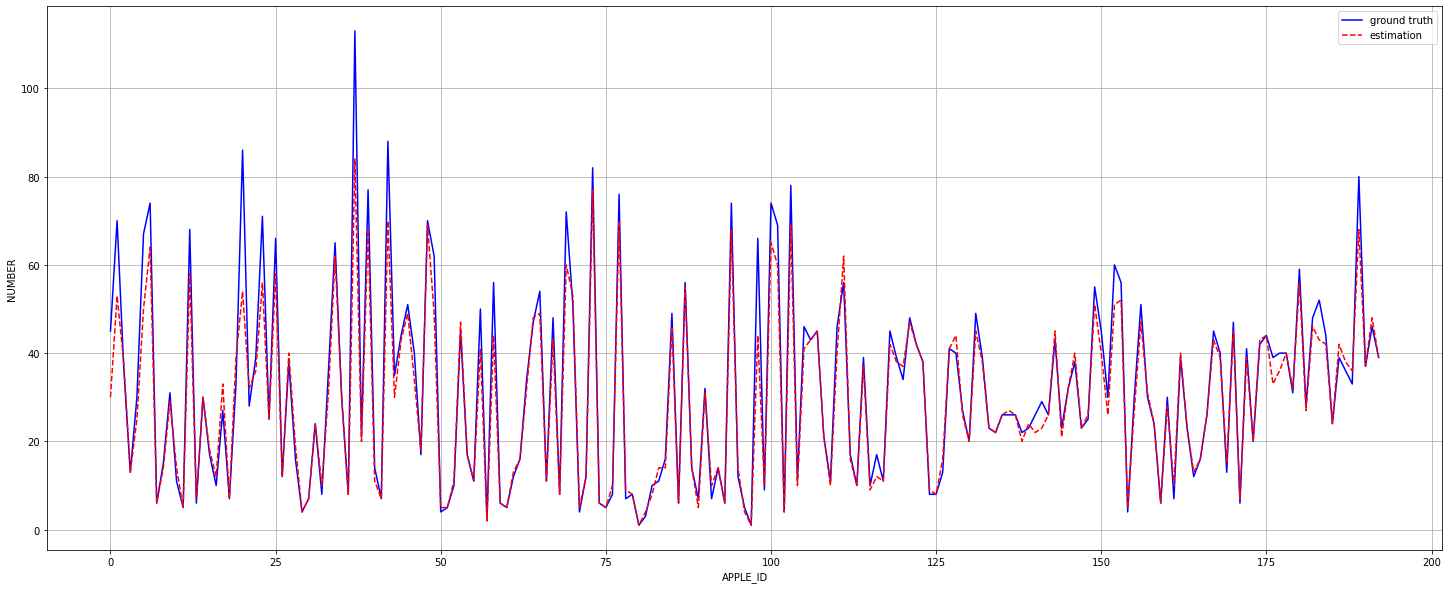

In [ ]:
plt.figure(figsize=(25,10))
plt.plot(range(len(gt_est)), gt_est[:, 0], 'b-', label = "ground truth")
plt.plot(range(len(gt_est)), gt_est[:, 1],'r--', label = "estimation")
plt.grid(True)
plt.legend()
plt.xlabel('APPLE_ID')
plt.ylabel('NUMBER')
plt.show()


70 58


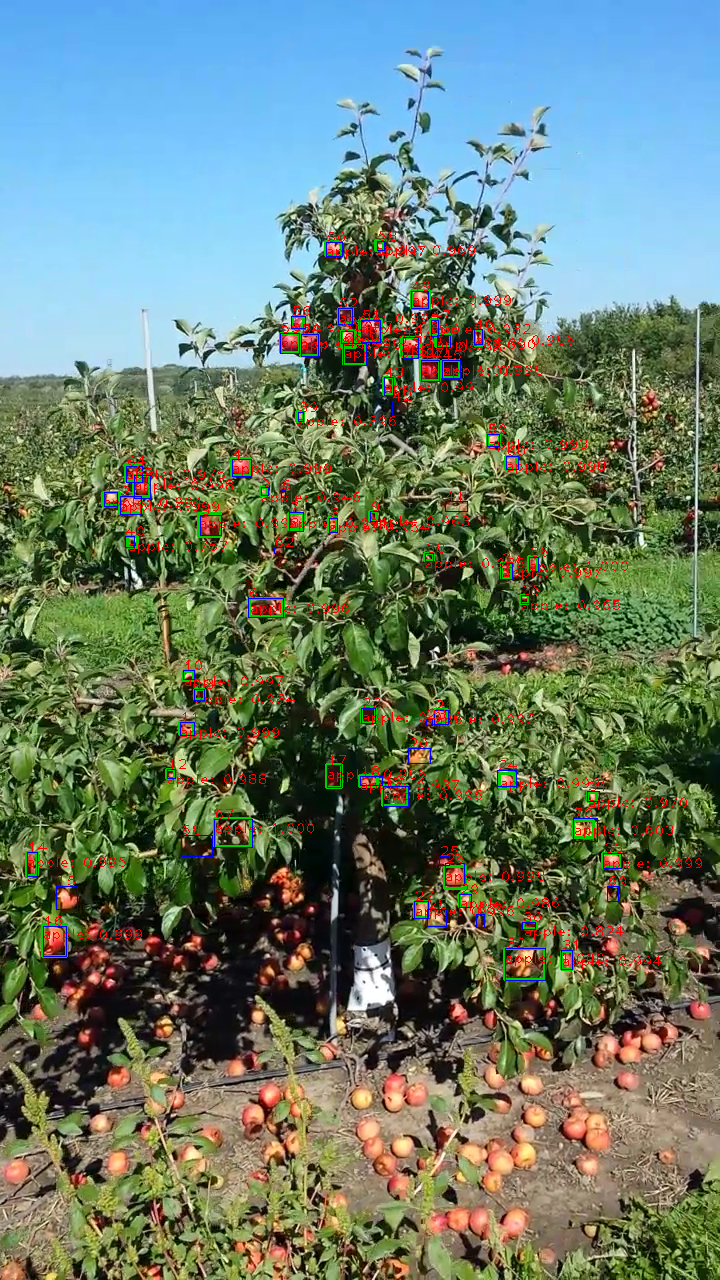

58


In [ ]:
img_path = os.path.join(img_dir,"000002.png")
im = cv2.imread(img_path)
class_name = 'apple'
dets = each_result[1]
thresh = 0.5
im, num, bbox = vis_detections(im, class_name, dets, thresh)
label = cv2.imread('/content/drive/MyDrive/MinneApple/dataset1/prediction/ref/masks/000002.png')
gt_boxs = box_and_num(label)[0]
print(len(gt_boxs), num)
for i, box in enumerate(gt_boxs):

  cv2.rectangle(im,(box[0],box[1]),(box[2],box[3]),(255,0,0),1)
  cv2.putText(im, str(i+1), (box[0],box[1]),cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255), 1)

cv2_imshow(im)
print(len(bbox))


In [ ]:
# 


In [ ]:
a = each_result[-4]
print(len(a))
len(py_cpu_nms(a, 0.4))


35


24

In [ ]:
label = cv2.imread('./train/masks/20150919_174151_image171.png')
img = cv2.imread('./train/images/20150919_174151_image171.png')

a = box_and_num(label)

print(a)

for i, box in enumerate(boxs):

  cv2.rectangle(img,(box[0],box[1]),(box[2],box[3]),(0,255,0),1)
  cv2.putText(img, str(i+1), (box[0],box[1]),cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255), 1)

cv2_imshow(img)